<a href="https://colab.research.google.com/github/ValentinoAllen/ai-learning-journey/blob/main/week1/Week1_Mental_Wellbeing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%writefile mental_wellbeing_log.csv
date,mood(1-5),sleep_hours,steps,screen_hours,social_hours,journal_score(1-10)
2025-01-01,3,6.5,4200,5.2,0.5,4
2025-01-02,4,7.2,5600,4.8,1.0,6
2025-01-03,2,5.0,3000,8.0,0.2,2
2025-01-04,5,8.1,7200,3.5,2.5,8
2025-01-05,3,6.2,4500,6.3,1.2,5
2025-01-06,4,7.5,6100,4.1,2.0,7
2025-01-07,2,4.8,2800,9.0,0.0,3
2025-01-08,5,8.3,7500,3.2,3.0,9
2025-01-09,3,6.1,4300,6.5,1.0,5
2025-01-10,4,7.0,5900,4.7,2.2,6


Writing mental_wellbeing_log.csv


In [4]:
import pandas as pd

df = pd.read_csv("mental_wellbeing_log.csv")
df.head()


,date,mood(1-5),sleep_hours,steps,screen_hours,social_hours,journal_score(1-10)
0,2025-01-01,3,6.5,4200,5.2,0.5,4
1,2025-01-02,4,7.2,5600,4.8,1.0,6
2,2025-01-03,2,5.0,3000,8.0,0.2,2
3,2025-01-04,5,8.1,7200,3.5,2.5,8
4,2025-01-05,3,6.2,4500,6.3,1.2,5


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 10 non-null     object 
 1   mood(1-5)            10 non-null     int64  
 2   sleep_hours          10 non-null     float64
 3   steps                10 non-null     int64  
 4   screen_hours         10 non-null     float64
 5   social_hours         10 non-null     float64
 6   journal_score(1-10)  10 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 692.0+ bytes


,mood(1-5),sleep_hours,steps,screen_hours,social_hours,journal_score(1-10)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.500000,6.670000,5110.000000,5.530000,1.360000,5.500000
std,1.080123,1.185139,1618.263816,1.903243,1.017841,2.173067
min,2.000000,4.800000,2800.000000,3.200000,0.000000,2.000000
25%,3.000000,6.125000,4225.000000,4.250000,0.625000,4.250000
50%,3.500000,6.750000,5050.000000,5.000000,1.100000,5.500000
75%,4.000000,7.425000,6050.000000,6.450000,2.150000,6.750000
max,5.000000,8.300000,7500.000000,9.000000,3.000000,9.000000


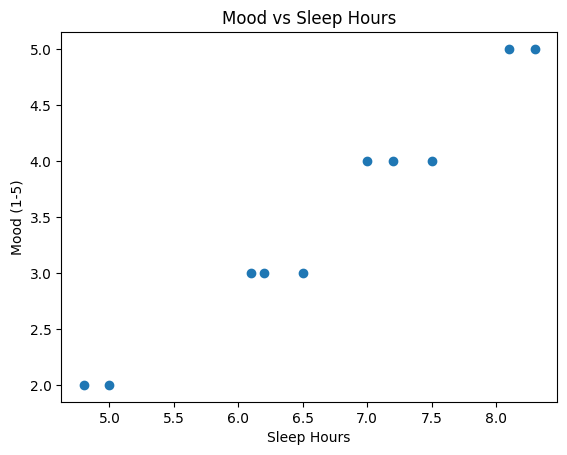

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['sleep_hours'], df['mood(1-5)'])
plt.title('Mood vs Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Mood (1-5)')
plt.show()


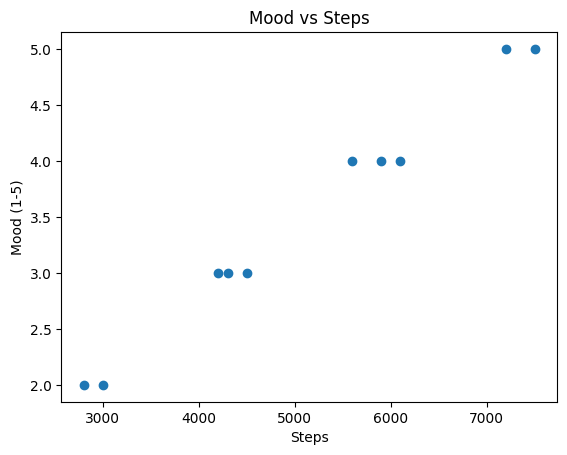

In [7]:
plt.scatter(df['steps'], df['mood(1-5)'])
plt.title('Mood vs Steps')
plt.xlabel('Steps')
plt.ylabel('Mood (1-5)')
plt.show()


In [8]:
df.corr(numeric_only=True)


,mood(1-5),sleep_hours,steps,screen_hours,social_hours,journal_score(1-10)
mood(1-5),1.000000,0.985168,0.994831,-0.953970,0.929805,0.970431
sleep_hours,0.985168,1.000000,0.983326,-0.986233,0.905260,0.959942
steps,0.994831,0.983326,1.000000,-0.953226,0.956813,0.977903
screen_hours,-0.953970,-0.986233,-0.953226,1.000000,-0.875147,-0.909387
social_hours,0.929805,0.905260,0.956813,-0.875147,1.000000,0.944414
journal_score(1-10),0.970431,0.959942,0.977903,-0.909387,0.944414,1.000000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['sleep_hours', 'steps', 'screen_hours', 'social_hours', 'journal_score(1-10)']]
y = df['mood(1-5)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model score:", model.score(X_test, y_test))


Model score: 0.772515200818254
